# Data Import

In [1]:
### Importing radiation data from .csv file, df_full is the whole sheet, df is the data used in the preliminary analysis

columns = ['deviceTime_utc','deviceTime_unix','cpm','keV_per_ch']
import pandas
df_full=pandas.read_csv(('etch_roof_d3s.csv'))
df = df_full[columns]
df

,deviceTime_utc,deviceTime_unix,cpm,keV_per_ch
0,2017-03-15 20:50:59+00:00,1489611059,2121.6,2.50
1,2017-03-15 20:55:59+00:00,1489611359,2149.8,2.50
2,2017-03-15 21:01:00+00:00,1489611660,2192.2,2.50
3,2017-03-15 21:14:54+00:00,1489612494,2145.8,2.50
4,2017-03-15 21:19:54+00:00,1489612794,2119.6,2.50
...,...,...,...,...
218286,2020-10-17 00:07:44+0000,1602893264,2352.6,2.57
218287,2020-10-17 00:12:44+0000,1602893564,2307.6,2.57
218288,2020-10-17 00:17:44+0000,1602893864,2322.6,2.57
218289,2020-10-17 00:22:44+0000,1602894164,2344.2,2.57


In [2]:
### Importing temperature data from .csv file, change values in "columns" if more/different data is needed

columns = ['deviceTime_utc','deviceTime_unix','temperature']
import pandas as pd
Tdf = pd.read_csv('etch_roof_weather.csv',usecols=columns)
Tdf

,deviceTime_utc,deviceTime_unix,temperature
0,2017-11-17 18:40:49+00:00,1510944049,17.57
1,2017-11-17 18:45:49+00:00,1510944349,17.04
2,2017-11-17 18:50:49+00:00,1510944649,16.58
3,2017-11-17 18:55:49+00:00,1510944949,16.39
4,2017-11-17 19:00:49+00:00,1510945249,16.20
...,...,...,...
219885,2021-04-23 23:10:40+0000,1619219439,14.54
219886,2021-04-23 23:15:40+0000,1619219739,14.19
219887,2021-04-23 23:20:41+0000,1619220039,14.87
219888,2021-04-23 23:25:40+0000,1619220339,14.92


## Trimming data frames

In [3]:
### If data sets begin at different times, trims the beginning rows off of the set to start earlier

import pandas
radtime = df.at[0,'deviceTime_unix'] #starting time of d3s dataframe
Ttime = Tdf.at[0,'deviceTime_unix'] #starting time of weather dataframe
if radtime > Ttime: # If df(radiation) begins later
    cutoffs=Tdf['deviceTime_unix'].between(radtime-1000,radtime+1000)
    if cutoffs.loc[cutoffs==True].empty: #error message if the constraints of previous line are too restrictive
        print('Time range provided is not suitable for this data. Try using a wider tolerance, and check signs for the ".between" bounds.')
    x=Tdf[cutoffs].drop(columns=['deviceTime_utc','temperature'])
    x=x-radtime
    y=x.min(axis=0)['deviceTime_unix'] #closest point to desired start time
    row=x.loc[x['deviceTime_unix']==y].index[0] #finds the row closest to desired start
    Tdf=Tdf[row:] #cuts off any excess early rows
    Tdf=Tdf.reset_index().drop(columns=['index','deviceTime_utc','keV_per_ch']) #resets indeces and trims columns
    print(Tdf)
    
elif Ttime > radtime: #If weather data (Tdf) begins later     
    cutoffs=df['deviceTime_unix'].between(Ttime-1000,Ttime+1000)
    if cutoffs.loc[cutoffs==True].empty:
        print('Time range provided is not suitable for this data. Try using a wider tolerance, and check signs for the ".between" bounds.')
    x=df[cutoffs].drop(columns=['deviceTime_utc','cpm','keV_per_ch'])
    x=x-Ttime
    y=x.min(axis=0)['deviceTime_unix'] #closest point to desired start time
    row=x.loc[x['deviceTime_unix']==y].index[0] #finds the row closest to desired start
    df_trimmed=df[row:] #cuts off any excess early rows
    df_trimmed=df_trimmed.reset_index().drop(columns=['index','deviceTime_utc','keV_per_ch']) #resets indeces and trims columns
    print(df_trimmed)


        deviceTime_unix     cpm
0            1510944055  2317.4
1            1510944355  2313.6
2            1510944655  2330.6
3            1510944955  2297.6
4            1510945255  2274.6
...                 ...     ...
182981       1602893264  2352.6
182982       1602893564  2307.6
182983       1602893864  2322.6
182984       1602894164  2344.2
182985       1602894465  2356.8

[182986 rows x 2 columns]


In [4]:
### If data sets end at different times, trims the ending rows off of the set to end later
### Very similar to previous cell, see above for other clarification

import pandas
radtime_e = df.at[df.index[-1],'deviceTime_unix'] #ending time of d3s dataframe
Ttime_e = Tdf.at[Tdf.index[-1],'deviceTime_unix'] #ending time of weather dataframe
if radtime_e < Ttime_e:
    cutoffs_e=Tdf['deviceTime_unix'].between(radtime_e-1000,radtime_e+1000)
    if cutoffs_e.loc[cutoffs_e==True].empty:
        print('Time range provided is not suitable for this data. Try using a wider tolerance, and check signs for the ".between" bounds.')
    x_e=Tdf[cutoffs_e].drop(columns=['deviceTime_utc'])
    x_e=abs(x_e-radtime_e)
    y_e=x_e.min(axis=0)['deviceTime_unix'] #closest point to desired start time
    row_e=x_e.loc[x_e['deviceTime_unix']==y_e].index[0] #finds the row closest to desired start
    Tdf=Tdf[:row_e] #cuts off any excess early rows
    Tdf=Tdf.reset_index().drop(columns=['index','deviceTime_utc']) #resets indeces and trims columns
    print(['Tdf',Tdf])
    
elif Ttime_e < radtime_e:     
    cutoffs_e=df['deviceTime_unix'].between(Ttime_e-1000,Ttime_e+1000)
    if cutoffs_e.loc[cutoffs_e==True].empty:
        print('Time range provided is not suitable for this data. Try using a wider tolerance, and check signs for the ".between" bounds.')
    x_e=df[cutoffs_e].drop(columns=['cpm','deviceTime_utc','keV_per_ch'])
    x_e=abs(x_e-Ttime_e)
    y_e=x_e.min(axis=0)['deviceTime_unix'] #closest point to desired start time
    row_e=x_e.loc[x_e['deviceTime_unix']==y].index[0] #finds the row closest to desired start
    df=df[:row_e+1] #cuts off any excess early rows
    df=df.reset_index().drop(columns=['index','deviceTime_utc','keV_per_ch']) #resets indeces and trims columns
    print(['df',df])


['Tdf',         deviceTime_unix  temperature
0            1510944049        17.57
1            1510944349        17.04
2            1510944649        16.58
3            1510944949        16.39
4            1510945249        16.20
...                 ...          ...
169011       1602892842        33.32
169012       1602893142        33.32
169013       1602893442        33.42
169014       1602893742        33.48
169015       1602894042        33.52

[169016 rows x 2 columns]]


## Preparing a Time dataframe

In [5]:
### Creating a frame for the amalgamated data (basically just an hourly calendar here)

import pandas as pd
import numpy as np
import datetime
 
combo = pd.DataFrame(np.zeros((25581,4))) # combo will be the name for the overall data frame from here on
combo.columns = ['Date (m/d/y)','Hour','cpm','temperature']

year = 2017
month = 11
day = 17
month31 = [1,3,5,7,8,10,12]
month30 = [4,6,9,11]
month28 = [2]
ind = 0
while year <=2020: # loops through until at least 2020, stopping if it reaches 2021
    if day == 17 and month == 10 and year == 2020: # desired ending date, can be changed accordingly
        break
    while month<13 and day<32: #in a given year, loops until december 31st
        if any(m==month for m in month31): # for months with 31 days
            while day<32: # within the month, loops until the end
                for i in range(0,24): #for each day, loops through hours
                    combo.loc[ind,'Hour'] = i #this line and next set hour and day for each row of combo
                    combo.loc[ind,'Date (m/d/y)'] = datetime.datetime(year,month,day).strftime("%x")
                    ind +=1
                if i == 23: #at the end of the day, rolls over to the next
                    day +=1
            else: #at the end of the month, rolls over to the next
                day =1
                month +=1
        elif any(m==month for m in month30): # for months with 30 days
            while day<31: #within the month, loops through 30th day
                for i in range(0,24): # within the day, loops through hours
                    combo.loc[ind,'Hour'] = i # as above, sets hour and date for each corresponding row of combo
                    combo.loc[ind,'Date (m/d/y)'] = datetime.datetime(year,month,day).strftime("%x")
                    ind +=1
                if i ==23: # rolls over to next day after 24 hours
                    day +=1
            else: # at the end of the month, rolls over to next
                day =1
                month +=1
        elif month ==2: # for february
            if year==2020: # for leap years (in this case just 2020)
                while day<30: #loops for 29 days
                    for i in range(0,24): # loops for 24 hours
                        combo.loc[ind,'Hour'] = i # sets date and hour for each corresponding row of combo
                        combo.loc[ind,'Date (m/d/y)'] = datetime.datetime(year,month,day).strftime("%x")
                        ind +=1
                    if i ==23: # rolls over to next day after 24 hours
                        day +=1
                else: # rolls over to next month
                    day =1
                    month +=1
            else: # for non-leap years
                while day<29: # loops for 28 days
                    for i in range(0,24): # loops for 24 hours
                        combo.loc[ind,'Hour'] = i # sets date and hour for each corresponding row of combo
                        combo.loc[ind,'Date (m/d/y)'] = datetime.datetime(year,month,day).strftime("%x")
                        ind +=1
                    if i ==23: # rolls over to next day
                        day +=1
                else: # rolls over to next month
                    day =1
                    month +=1
    else: # rolls over to next year on december 31st
        month = 1
        day = 1
        year += 1
        
                
         
combo

,Date (m/d/y),Hour,cpm,temperature
0,11/17/17,0.0,0.0,0.0
1,11/17/17,1.0,0.0,0.0
2,11/17/17,2.0,0.0,0.0
3,11/17/17,3.0,0.0,0.0
4,11/17/17,4.0,0.0,0.0
...,...,...,...,...
27379,12/31/20,19.0,NaN,NaN
27380,12/31/20,20.0,NaN,NaN
27381,12/31/20,21.0,NaN,NaN
27382,12/31/20,22.0,NaN,NaN


In [6]:
### Correcting for daylight savings

import pandas
combo.at[8449.5,'Hour']=1 # adds an "extra" 1 A.M. for 11/4/18
combo.at[8449.5,'Date (m/d/y)']=datetime.datetime(2018,11,4).strftime("%x") # labels 11/4/18
combo=combo.drop(index=2738) # drops an hour for 3/11/18
combo=combo.drop(index=11474) # drops an hour for 3/10/19
combo.at[17185.5,'Hour']=1 # adds an "extra" 1 A.M. for 11/3/19
combo.at[17185.5,'Date (m/d/y)']=datetime.datetime(2019,11,3).strftime("%x") # labels 11/3/19
combo=combo.drop(index=20210) # drops an hour for 3/8/20
combo=combo.sort_index().reset_index(drop=True) # sorts and re-indexes the combo dataframe

In [7]:
### Trimming Combo to appropriate size and resetting index

import pandas
combo = pandas.concat([combo[10:25553]],ignore_index=True) #trims combo to only include the intended days and hours
combo

,Date (m/d/y),Hour,cpm,temperature
0,11/17/17,10.0,0.0,0.0
1,11/17/17,11.0,0.0,0.0
2,11/17/17,12.0,0.0,0.0
3,11/17/17,13.0,0.0,0.0
4,11/17/17,14.0,0.0,0.0
...,...,...,...,...
25538,10/16/20,13.0,0.0,0.0
25539,10/16/20,14.0,0.0,0.0
25540,10/16/20,15.0,0.0,0.0
25541,10/16/20,16.0,0.0,0.0


In [8]:
### Assigning Unix time to combo

import numpy as np

x1 = 1510941600 # Unix time for 10 (am) local time on 11/17/2017
x2 = x1 + 25542*3600 # Unix time for 17:00 (5 P.M.) local time on 10/16/2020
unix = np.linspace(x1,x2,25543) # creating an array of unix times
combo.insert(loc=1,column='Unix Time',value=unix) # adding in a column and unix values
combo

,Date (m/d/y),Unix Time,Hour,cpm,temperature
0,11/17/17,1.510942e+09,10.0,0.0,0.0
1,11/17/17,1.510945e+09,11.0,0.0,0.0
2,11/17/17,1.510949e+09,12.0,0.0,0.0
3,11/17/17,1.510952e+09,13.0,0.0,0.0
4,11/17/17,1.510956e+09,14.0,0.0,0.0
...,...,...,...,...,...
25538,10/16/20,1.602878e+09,13.0,0.0,0.0
25539,10/16/20,1.602882e+09,14.0,0.0,0.0
25540,10/16/20,1.602886e+09,15.0,0.0,0.0
25541,10/16/20,1.602889e+09,16.0,0.0,0.0


## Combining all of the data into one dataframe

In [9]:
### WIP/Reference for averaging

### Hourly averaging of rad and temperature data

import pandas as pd
import numpy as np

# cpm assignment
for i in combo.index: # iterates through every index in combos (go through by hour)
    start = combo.at[i,'Unix Time']
    end = start + 3600
    
    placeholder = df['deviceTime_unix'].between(start,end) # outputs a boolean array corresponding to rows in this range
    if placeholder.loc[placeholder==True].empty: # if there are no values in the range, skip to the next range
        continue
    values = df[placeholder] # get the values from the actual dataframe corresponding to the boolean array
    average_counts = np.mean(values['cpm']) # average the extracted values
    combo.loc[i,'cpm'] = average_counts # place the average in the appropriate spot in the "combo" dataframe
    
# temperature assignment
for i in combo.index:                     # same process as cpm assignment, but with data frame and column names changed
    start = combo.at[i,'Unix Time']
    end = start + 3600
    
    placeholder = Tdf['deviceTime_unix'].between(start,end)
    if placeholder.loc[placeholder==True].empty:
        continue
    values = Tdf[placeholder]
    average_counts = np.mean(values['temperature'])
    combo.loc[i,'temperature'] = average_counts    
    
combo

,Date (m/d/y),Unix Time,Hour,cpm,temperature
0,11/17/17,1.510942e+09,10.0,2314.800000,16.895000
1,11/17/17,1.510945e+09,11.0,2299.200000,16.904167
2,11/17/17,1.510949e+09,12.0,2307.683333,17.913333
3,11/17/17,1.510952e+09,13.0,2305.133333,18.543333
4,11/17/17,1.510956e+09,14.0,2303.750000,19.081667
...,...,...,...,...,...
25538,10/16/20,1.602878e+09,13.0,2318.350000,31.474167
25539,10/16/20,1.602882e+09,14.0,2320.200000,32.022500
25540,10/16/20,1.602886e+09,15.0,2309.966667,32.568333
25541,10/16/20,1.602889e+09,16.0,2322.783333,32.964167


In [10]:
### Removing any rows with zeros for either cpm or temperature (indicating dropped data)

import pandas
mod_combo = combo # copying combo to a dataframe that can be modified without changing the original
cpm_zeros = (combo['cpm'] != 0) # boolean output: nonzero rows marked as "True", zero rows as "False"
cpm_zero_count = cpm_zeros.loc[cpm_zeros == True] # checking how many nonzero rows there are, to cross-check that this approach was correct
mod_combo = mod_combo[cpm_zeros] # removing any rows from mod_combo that have a zero value for cpm
temp_zeros = (mod_combo['temperature'] != 0) # same as cpm_zeros
mod_combo = mod_combo[temp_zeros] # same as cpm_zeros
mod_combo=mod_combo.reset_index(drop = True)

In [11]:
### Checking how many zero values exist in each column of mod_columns; 
### Hour is the ONLY column that should have zeros at this point

(mod_combo == 0).sum()

Date (m/d/y)      0
Unix Time         0
Hour            598
cpm               0
temperature       0
dtype: int64

### Goals: 
#### -Binning histogram data
#### -selecting a specific band of data
#### -plotting
#### -spectral correction?

## Looking at a specific section of data (I've made a pretty big mess of this section)

In [29]:
section = mod_combo[11400:11928].reset_index(drop=False)
section

,index,Date (m/d/y),Unix Time,Hour,cpm,temperature
0,11400,08/07/19,1.565219e+09,16.0,2287.722222,23.620000
1,11401,08/11/19,1.565564e+09,16.0,2284.709091,24.597273
2,11402,08/11/19,1.565568e+09,17.0,2287.983333,25.060833
3,11403,08/11/19,1.565572e+09,18.0,2283.716667,25.486667
4,11404,08/11/19,1.565575e+09,19.0,2301.116667,25.546667
...,...,...,...,...,...,...
523,11923,09/05/19,1.567735e+09,19.0,2292.766667,23.596667
524,11924,09/05/19,1.567739e+09,20.0,2288.933333,22.967500
525,11925,09/05/19,1.567742e+09,21.0,2291.116667,22.617500
526,11926,09/05/19,1.567746e+09,22.0,2284.733333,22.480833


In [ ]:
mod_combo[10934:11991]

In [ ]:
import pandas
import matplotlib.pyplot as mp
%matplotlib inline

mod_combo.hist(column='cpm')
mp.title('Cpm histogram for the whole data set')
mp.xlabel('counts')
mp.ylabel('data points')
mp.show()

In [ ]:
import pandas
import matplotlib.pyplot as mp

mod_combo.hist(column='temperature')
mp.title('Temperature histogram')
mp.xlabel('T')
mp.ylabel('data points')

In [ ]:
### Plotting Temperature vs Time

import matplotlib.pyplot as mp
mp.scatter(section['Unix Time'],section['temperature'])
mp.title('Temperature vs Unix Time')
mp.xlabel('Unix Time')
mp.ylabel('Temperature (C)')

In [ ]:
### Plotting cpm vs Time

import matplotlib.pyplot as mp
mp.scatter(section['Unix Time'],section['cpm'])
mp.title('Counts per minute vs Unix Time')
mp.xlabel('Unix Time')
mp.ylabel('Counts per minute')

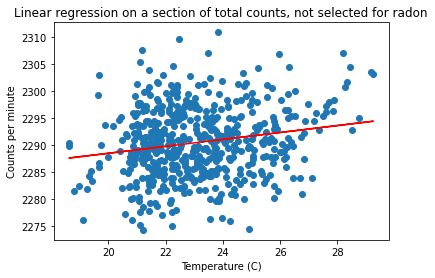

In [32]:
# Plotting cpm vs temperature

import matplotlib.pyplot as mp
mp.scatter(section['temperature'],section['cpm'])
mp.title('Linear regression on a section of total counts, not selected for radon')
mp.xlabel('Temperature (C)')
mp.ylabel('Counts per minute')
mp.plot(x,ypred,color = 'red')
mp.show()

## Stat analysis for SECTION

In [31]:
### Simple linear regression on the data set
import numpy as np

## Reading each column of data, and converting to a numpy array
x=section['temperature'].to_numpy()
y=section['cpm'].to_numpy()

## Calculating the mean of each array
xmean = np.mean(x)
ymean = np.mean(y)

## Calculating covariance
xycov = (x-xmean)*(y-ymean)
xvar = (x-xmean)**2

## Calculating regression coefficients
beta = xycov.sum()/xvar.sum()
alpha = ymean - (beta*xmean)
print('alpha =',alpha)
print('beta =',beta)

## Predicting y-values based on the model
ypred = alpha + beta*x

## Finding R^2 value for the data set
r = np.corrcoef(x,y)[0,1]
r_squared = r**2
r_squared

alpha = 2275.629640329
beta = 0.6418079986434817


0.0359611516570636

# Testing Area

In [ ]:
### First attempt at somehow extracting date and time from df and Tdf

import pandas as pd
yt = Tdf.at[0,'deviceTime_utc']
yt1 = yt[0:10]
yt2 = yt[11:13]
ytfinal = [[yt1],[yt2]]
ytfinal

In [ ]:
### Not useful currently

### To combine Temperature and radiation data frames and produce one set of time-aligned T-rad data

import pandas as pd
limit1 = int(df_trimmed.at[0,'deviceTime_unix'])
limit2 = int(df_trimmed.at[df_trimmed.index[-1],'deviceTime_unix'])
combo = pd.DataFrame({'unixTime_complete':range(limit1,limit2+1)})
combo

In [ ]:
### Not useful currently

### Taking one data point per day at approximately the same time, if possible. 
## Runs fine as of 4:05PM 6/22

import pandas as pd
daily = df[0:1]
row = 0
n = 0
seconds_per_day = 3600*24
for i in range (20):
    starttime = df.at[row,'deviceTime_unix']
    endtime = starttime+(seconds_per_day*(n+1))
    r = df.loc[(df['deviceTime_unix']<=endtime) & (df['deviceTime_unix']>=starttime)]  
    new_r = r.tail(1)
    to_compare = pd.concat([new_r,daily.tail(1)],ignore_index=True)
    if new_r.empty == True:
        n = n+1
    elif to_compare.at[0,'deviceTime_unix']-to_compare.at[1,'deviceTime_unix']<seconds_per_day/4:
        n = n+1
    else:
        if endtime - to_compare.at[0,'deviceTime_unix'] < 60:
            n = 0
            row = new_r[new_r['deviceTime_unix'] == new_r['deviceTime_unix']].index[0]
        else:
            n = n+1
        daily = pd.concat([daily,new_r],ignore_index=True)
        
        
daily

In [ ]:
### Using the datetime package to create values for dates

import datetime
d = datetime.datetime(2017,11,17)
d=d.strftime("%x")
d

In [ ]:
### Test with appending to a data frame via concatenation

import pandas as pd
test1 = df_trimmed[0:1]
for i in range(1,4):
    fill = df_trimmed[i:i+1]
    test1 = pd.concat([test1,fill],ignore_index=True)
    
test1

In [ ]:
### Practice making and combining data frames

import pandas
d1 = pandas.DataFrame({'A':[0,1,2]},index=[0,1,2])
d1b = pandas.DataFrame({'B':[3,2,5]},index=[0,1,2])
d1 = pandas.concat([d1,d1b],axis=1)
d2 = pandas.DataFrame({'A':[4]},index=[0])
d3 = pandas.concat([d1,d2],ignore_index=True)
d4 = pandas.DataFrame({'A':range(1,30**4+1)},index=range(0,30**4))
d3[d3['A'] == 1].index[0]
d1.iloc[:,1:2]

In [ ]:
### To find a value in a dataframe within a range of values

import pandas
d4=d3
test1=d3['A'].between(1,2)
test1.loc[test1==True].index[0]
